<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Adaptive_Organizational_Stress_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

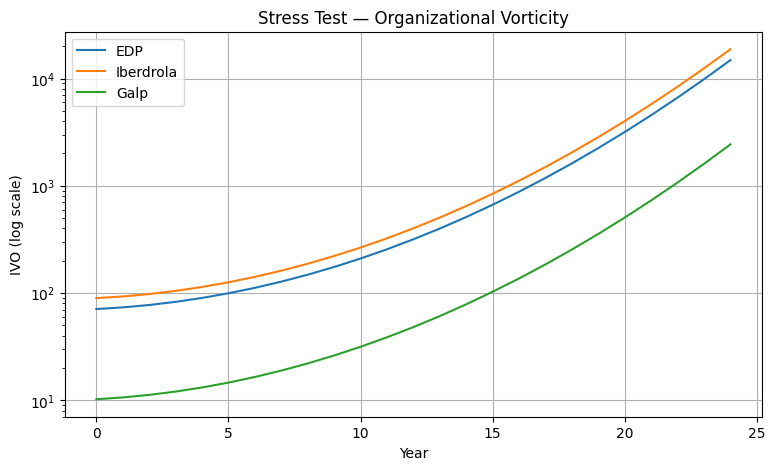

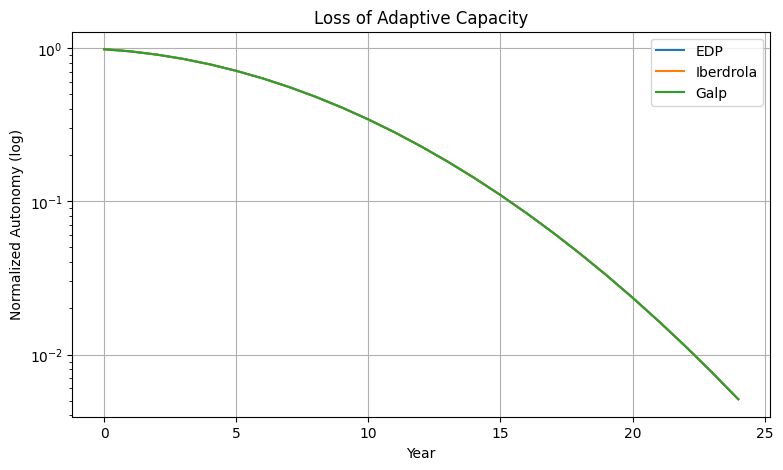


=== Time to Structural Risk ===

     Company  Time_to_Critical_Autonomy (years)
0        EDP                                 10
1  Iberdrola                                 10
2       Galp                                 12

=== Normalized Dashboard Metrics ===

           IVO_final_norm  Autonomy_final_norm  Rigidity_final_norm
Company                                                            
EDP                   1.0             0.005106                  1.0
Iberdrola             1.0             0.005106                  1.0
Galp                  1.0             0.005106                  1.0

=== Executive Interpretation ===


Company: EDP
----------------------------------
• Estimated time to structural risk: 10 years
• Failure mode: loss of adaptive autonomy under sustained growth
• Interpretation: growth becomes self-limiting unless coordination and rigidity are actively managed


Company: Iberdrola
----------------------------------
• Estimated time to structural risk: 10 yea

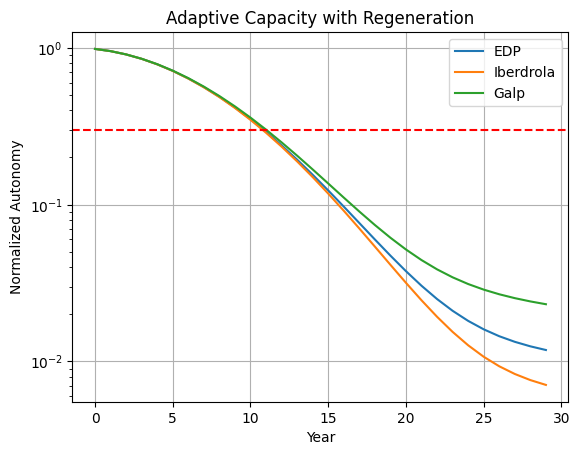


=== Time to Structural Risk ===

EDP: 11 years
Iberdrola: 10 years
Galp: 12 years


In [2]:
# ============================================================
# Structural Failure Scanner™ — Stress Test Notebook (v1.1)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Company data (public proxies + structural heterogeneity)
# ------------------------------------------------------------

companies = {
    "EDP": {
        "revenue_curr": 15.6e9,
        "countries": 29,
        "employees": 13211,
        "renewables_pct": 90,
        "autonomy_factor": 0.9,   # regulated utility
        "A_crit": 0.35
    },
    "Iberdrola": {
        "revenue_curr": 50.1e9,
        "countries": 34,
        "employees": 41500,
        "renewables_pct": 80,
        "autonomy_factor": 0.8,   # highly centralized global utility
        "A_crit": 0.40
    },
    "Galp": {
        "revenue_curr": 23.4e9,
        "countries": 10,
        "employees": 6400,
        "renewables_pct": 40,
        "autonomy_factor": 1.2,   # more flexible / trading-oriented
        "A_crit": 0.25
    }
}

# ------------------------------------------------------------
# Stress-test model (dimensionless, ergontropic-consistent)
# ------------------------------------------------------------

def stress_test(company,
                G=0.07,        # forced annual growth
                T=25,          # years
                alpha=1.0,
                beta=0.4,      # coordination sensitivity
                gamma=0.6,     # autonomy decay strength
                delta=0.03):   # rigidity accumulation

    # Initial state
    F = company["revenue_curr"]
    F0 = F

    C = company["countries"] * np.log(company["employees"])
    R = company["renewables_pct"] / 100

    A_agents = np.array([1/(i+1) for i in range(company["countries"])])
    A0 = company["autonomy_factor"] * A_agents.sum()
    A = A0

    A_crit = company["A_crit"]
    t_fail = None

    history = []

    for t in range(T):
        # Growth
        F = F * (1 + alpha * G)

        # Coordination grows with relative scale (dimensionless)
        C_prev = C
        C = C + beta * np.log(F / F0)

        # Rigidity accumulates with sustained success
        R = R + delta * G

        # Autonomy decay depends on coordination gradient
        dC = C - C_prev
        A = A * np.exp(-gamma * dC)

        autonomy_norm = A / A0
        IVO = (C * R) / (A + 1e-12)

        if t_fail is None and autonomy_norm < A_crit:
            t_fail = t

        history.append({
            "Year": t,
            "Revenue": F,
            "Coordination": C,
            "Rigidity": R,
            "Autonomy": A,
            "Autonomy_norm": autonomy_norm,
            "IVO": IVO
        })

    return pd.DataFrame(history), t_fail

# ------------------------------------------------------------
# Run simulations
# ------------------------------------------------------------

results = {}
failure_times = {}

for name, data in companies.items():
    df, t_fail = stress_test(data)
    results[name] = df
    failure_times[name] = t_fail

# ------------------------------------------------------------
# Plot 1 — Organizational Vorticity
# ------------------------------------------------------------

plt.figure(figsize=(9,5))
for name, df in results.items():
    plt.plot(df["Year"], df["IVO"], label=name)

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("IVO (log scale)")
plt.title("Stress Test — Organizational Vorticity")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# Plot 2 — Loss of Adaptive Capacity
# ------------------------------------------------------------

plt.figure(figsize=(9,5))
for name, df in results.items():
    plt.plot(df["Year"], df["Autonomy_norm"], label=name)

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Normalized Autonomy (log)")
plt.title("Loss of Adaptive Capacity")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# Time-to-risk summary (core business output)
# ------------------------------------------------------------

summary_df = pd.DataFrame([
    {
        "Company": name,
        "Time_to_Critical_Autonomy (years)": failure_times[name]
    }
    for name in companies.keys()
])

print("\n=== Time to Structural Risk ===\n")
print(summary_df)

# ------------------------------------------------------------
# Normalized dashboard metrics (0–1)
# ------------------------------------------------------------

dashboard_df = pd.DataFrame([
    {
        "Company": name,
        "IVO_final_norm": df["IVO"].iloc[-1] / df["IVO"].max(),
        "Autonomy_final_norm": df["Autonomy_norm"].iloc[-1],
        "Rigidity_final_norm": df["Rigidity"].iloc[-1] / df["Rigidity"].max()
    }
    for name, df in results.items()
]).set_index("Company")

print("\n=== Normalized Dashboard Metrics ===\n")
print(dashboard_df)

# ------------------------------------------------------------
# Executive interpretation (auto-generated)
# ------------------------------------------------------------

print("\n=== Executive Interpretation ===\n")

for _, row in summary_df.iterrows():
    print(f"""
Company: {row['Company']}
----------------------------------
• Estimated time to structural risk: {row['Time_to_Critical_Autonomy (years)']} years
• Failure mode: loss of adaptive autonomy under sustained growth
• Interpretation: growth becomes self-limiting unless coordination and rigidity are actively managed
""")

###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

companies = {
    "EDP": {
        "revenue_curr": 15.6e9,
        "countries": 29,
        "employees": 13211,
        "renewables_pct": 90,
        "autonomy_factor": 0.9,
        "A_crit": 0.35,
        "eta": 0.015
    },
    "Iberdrola": {
        "revenue_curr": 50.1e9,
        "countries": 34,
        "employees": 41500,
        "renewables_pct": 80,
        "autonomy_factor": 0.8,
        "A_crit": 0.40,
        "eta": 0.008
    },
    "Galp": {
        "revenue_curr": 23.4e9,
        "countries": 10,
        "employees": 6400,
        "renewables_pct": 40,
        "autonomy_factor": 1.2,
        "A_crit": 0.25,
        "eta": 0.030
    }
}

def stress_test(company, G=0.07, T=30,
                alpha=1.0, beta=0.4, gamma=0.6, delta=0.03):

    F = company["revenue_curr"]
    F0 = F

    C = company["countries"] * np.log(company["employees"])
    R = company["renewables_pct"] / 100

    A_agents = np.array([1/(i+1) for i in range(company["countries"])])
    A0 = company["autonomy_factor"] * A_agents.sum()
    A = A0

    eta = company["eta"]
    A_crit = company["A_crit"]

    history = []
    t_fail = None

    for t in range(T):
        # growth
        F *= (1 + alpha * G)

        # coordination stress
        C_prev = C
        C += beta * np.log(F / F0)
        dC = C - C_prev

        # rigidity
        R += delta * G

        # autonomy balance (loss + regeneration)
        A = A * np.exp(-gamma * dC) + eta * (1 - A / A0)

        A_norm = A / A0
        IVO = (C * R) / (A + 1e-12)

        if t_fail is None and A_norm < A_crit:
            t_fail = t

        history.append({
            "Year": t,
            "Autonomy_norm": A_norm,
            "IVO": IVO
        })

    return pd.DataFrame(history), t_fail

results = {}
failure_times = {}

for name, data in companies.items():
    df, t_fail = stress_test(data)
    results[name] = df
    failure_times[name] = t_fail

# plots
plt.figure()
for name, df in results.items():
    plt.plot(df["Year"], df["Autonomy_norm"], label=name)

plt.axhline(0.3, linestyle="--", color="red")
plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Normalized Autonomy")
plt.title("Adaptive Capacity with Regeneration")
plt.legend()
plt.grid(True)
plt.show()

print("\n=== Time to Structural Risk ===\n")
for k, v in failure_times.items():
    print(f"{k}: {v} years")
